# Simple Prediction Model

### Importing Libraries:

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [134]:
import warnings
warnings.filterwarnings("ignore")

### Data Preview: 

In [3]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.shape

(150, 6)

In [9]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization:

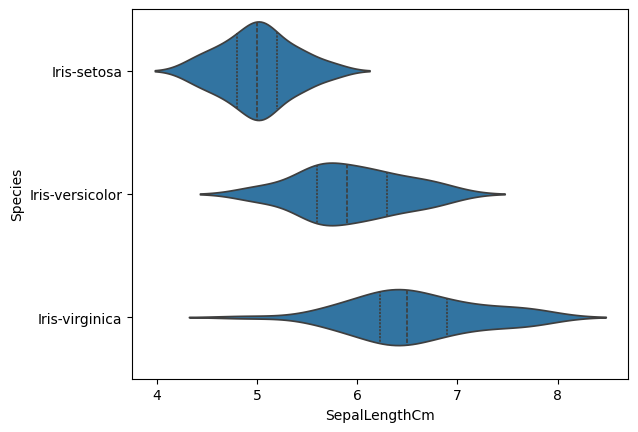

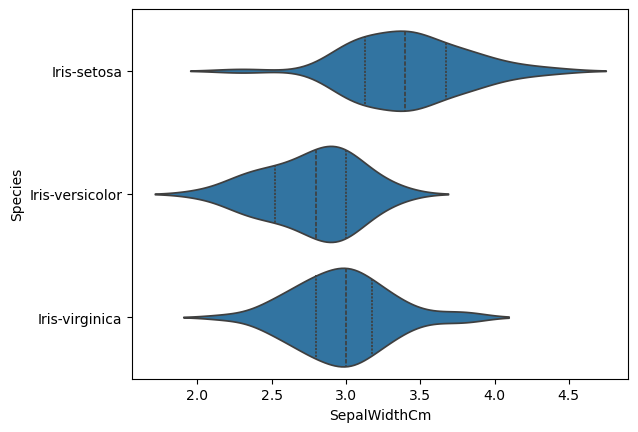

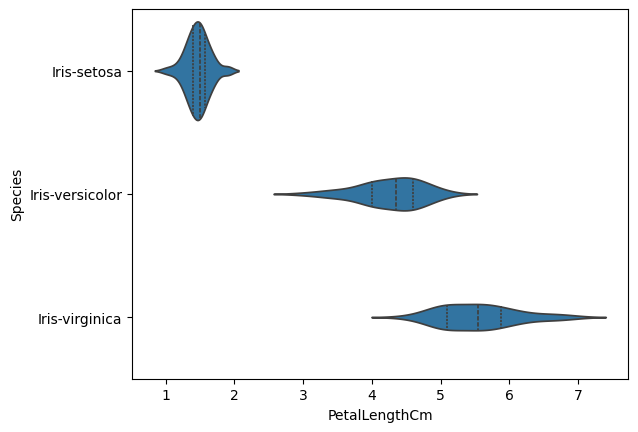

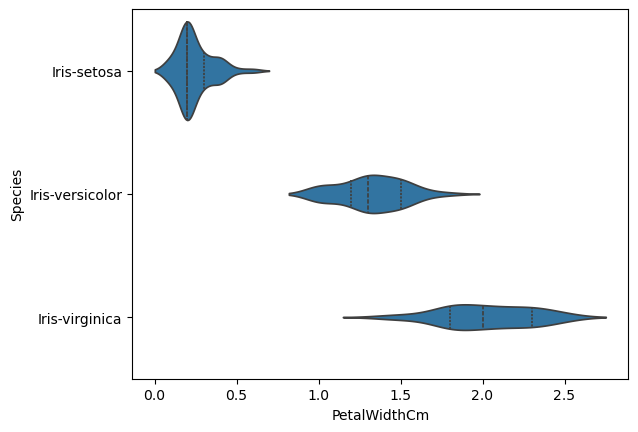

In [15]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()


In [132]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
#print(X.head())
print(X.shape)
#print(y.head())
print(y.shape)

(150, 4)
(150,)


### Split the Iris Dataset into Training set and Test set:

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # Test: 30% and Training: 70%
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### Experimenting with different n values:

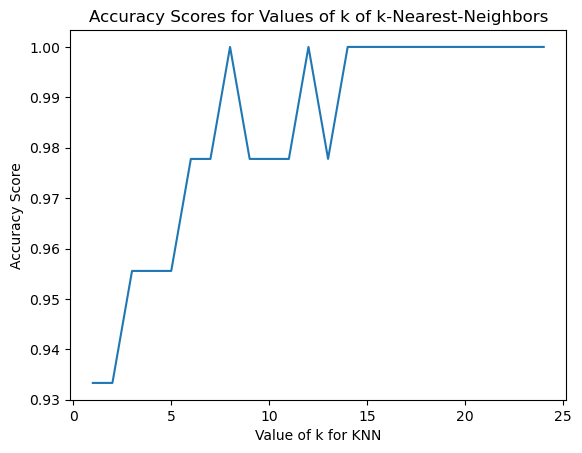

In [150]:
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Choosing KNN to Model Iris Species Prediction with k=9.

In [153]:
#Using KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, y) #taking the whole Data
# predict for an example of an out-of-sample observation
print(knn.predict([[6.7, 3.3, 5.7, 2]])) #Correct Answer : Iris-virginica

['Iris-virginica']


In [130]:
#Measuring Accuracy for KNN model
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


### Using Logistic Regression:

In [126]:
#Using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
# Measuring Accuracy for LR Model
print(metrics.accuracy_score(y_test, y_pred_lr))

0.9777777777777777


### Confusion Matrix:

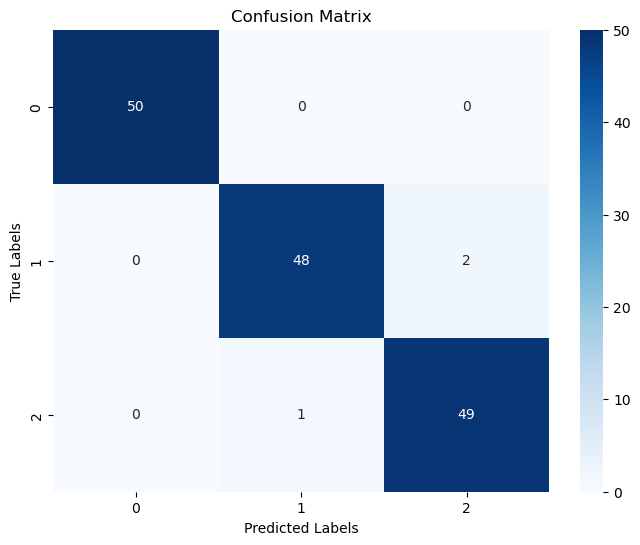

In [181]:
y_pred_150 = knn.predict(X)
confusion_mat = confusion_matrix(y, y_pred_150)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()